In [ ]:
##########

## Project: Censoring Faces in a Video with OpenCV

##########

# Warm-Up: Displaying a Video Frame at a Specific Timestamp

In [ ]:
# load OpenCV package

In [1]:
import cv2

In [2]:
# read in the video

In [3]:
video = cv2.VideoCapture("video.mp4")

In [4]:
# define video characteristics variables

In [5]:
width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
nr_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
fps = video.get(cv2.CAP_PROP_FPS)
length_vid = nr_frames/fps

In [5]:
# let's print the video characteristics

In [6]:
print(width, height, nr_frames, fps,length_vid)

1920.0 1080.0 90.0 30.0 3.0


In [7]:
# now let's display the frame at a specific timestamp

In [8]:
# note that the video is 3 seconds long

In [9]:
timestamp = '00:00:02.75'

In [10]:
timestamp_list = timestamp.split(':')

In [11]:
hh, mm, ss = timestamp_list

In [12]:
timestamp_list_floats = [float(i) for i in timestamp_list]

In [13]:
hours, minutes, seconds = timestamp_list_floats

In [14]:
frame_nr = hours*3600*fps + minutes*60*fps + seconds*fps

In [15]:
video.set(1, frame_nr)

True

In [16]:
success, frame = video.read()

In [17]:
cv2.imwrite(f'Frame at {hh}:{mm}:{ss}.jpg',frame)

True

In [18]:
# now let's display our image at the selected timestamp

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

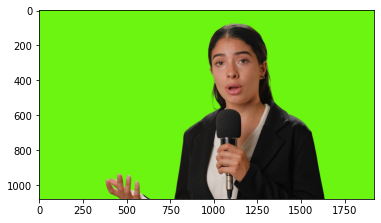

In [20]:
plt.imshow(plt.imread('/content/Frame at 00:00:02.75.jpg'))

# Warm-Up: Detecting Faces in a Video

In [21]:
# read in the new video sample

In [22]:
video = cv2.VideoCapture("video.mp4")

In [23]:
# read the first frame of video

In [24]:
success, frame = video.read()

In [21]:
# we want to place a rectangular frame around detected faces
# we first define height and width of frames in the video

In [25]:
height = frame.shape[0]
width = frame.shape[1]

In [26]:
# define the face classifier using our .xml file

In [27]:
face_cascade = cv2.CascadeClassifier('faces.xml')

In [28]:
# create an empty .avi file

In [29]:
output = cv2.VideoWriter('output.avi', 
cv2.VideoWriter_fourcc(*'DIVX'), 30, (width, height))

In [30]:
# and now let's detect faces, then modify those frames that contain faces, then write the new frames to our empty video file

In [31]:
count = 0

In [32]:
while success:
  faces = face_cascade.detectMultiScale(frame, 1.1, 4)
  for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 4)
  output.write(frame)
  success, frame = video.read()
  count += 1
  print(count)

output.release()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [ ]:
# and now we have our output video in our directory. (Best played from a video player to see full result)

In [33]:
# now let's display the same frame from the video as previously

In [34]:
video = cv2.VideoCapture("output.avi")

In [35]:
video.set(1, frame_nr)

True

In [36]:
success, frame = video.read()

In [37]:
cv2.imwrite(f'Frame2 at {hh}:{mm}:{ss}.jpg',frame)

True

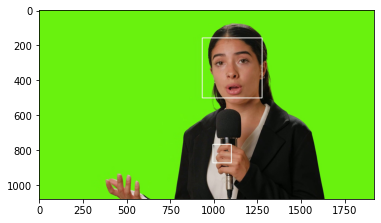

In [38]:
plt.imshow(plt.imread('/content/Frame2 at 00:00:02.75.jpg'))

In [ ]:
# Enough warming up, let's censor a video now..

# Exercise: Censoring Faces in a Video

In [49]:
# reading in our new video

In [39]:
video = cv2.VideoCapture('smile.mp4')

In [40]:
width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
nr_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
fps = video.get(cv2.CAP_PROP_FPS)
length_vid = nr_frames/fps

In [41]:
# let's print the video characteristics

In [42]:
print(width, height, nr_frames, fps,length_vid)

1920.0 1080.0 90.0 30.0 3.0


In [ ]:
# now let's display the frame at a specific timestamp

In [43]:
timestamp = '00:00:01'

In [44]:
timestamp_list = timestamp.split(':')

In [45]:
hh, mm, ss = timestamp_list

In [46]:
timestamp_list_floats = [float(i) for i in timestamp_list]

In [47]:
hours, minutes, seconds = timestamp_list_floats

In [48]:
frame_nr = hours*3600*fps + minutes*60*fps + seconds*fps

In [49]:
video.set(1, frame_nr)

True

In [50]:
success, frame = video.read()

In [51]:
cv2.imwrite(f'Smile at {hh}:{mm}:{ss}.jpg',frame)

True

In [52]:
# now let's display our image at the selected timestamp

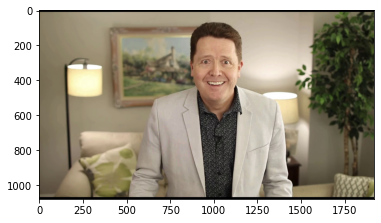

In [53]:
plt.imshow(plt.imread('/content/Smile at 00:00:01.jpg'))

In [ ]:
# and now let's move to censoring the face in the video

In [ ]:
# read in first frame in video (it returns a tuple by the way). But FIRST reset 'cursor' to first frame

In [54]:
video.set(1, 0)

True

In [55]:
success, frame = video.read()

In [ ]:
# get video width and height

In [56]:
height = frame.shape[0]
width = frame.shape[1]

In [ ]:
# define face classifier using our xml file

In [57]:
face_cascade = cv2.CascadeClassifier('faces.xml')

In [ ]:
# create an empty video

In [58]:
output = cv2.VideoWriter('blurred.avi', 
cv2.VideoWriter_fourcc(*'DIVX'), 30, frameSize=(width, height))

In [ ]:
# and now let's detect faces, then modify those frames that contain faces by blurring them, 
# then write the new frames to our empty video file

In [59]:
count = 0
while success:
  faces = face_cascade.detectMultiScale(frame, 1.1, 4)
  for (x, y, w, h) in faces:
    frame[y:y+h, x:x+w] = cv2.blur(frame[y:y+h, x:x+w], (50, 50))
  output.write(frame)
  success, frame = video.read()
  count += 1
  print(count)

output.release()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [60]:
# and now we have our output video in our directory. (Best played from a video player to see full result)

In [61]:
# now let's display the same frame from the video as initially

In [62]:
video = cv2.VideoCapture("blurred.avi")

In [63]:
video.set(1, frame_nr)

True

In [64]:
success, frame = video.read()

In [65]:
cv2.imwrite(f'Smile2 at {hh}:{mm}:{ss}.jpg',frame)

True

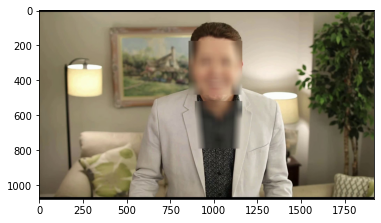

In [66]:
plt.imshow(plt.imread('/content/Smile2 at 00:00:01.jpg'))

In [ ]:
# Done! we now have a blurred version of our video